# Percentiles en Mapas

Así como vimos las anomalías, también podemos analizar los percentiles en un mapa.

In [ ]:
pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.5 MB/s eta 0:00:00


In [ ]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.1 MB/s eta 0:00:00


In [ ]:
# Librerías
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
from netCDF4 import num2date
import datetime
import matplotlib as mpl


Si se dan cuenta, hay una librería que les mencionaron pero no la hemos explorado, se llama netCDF4 y así como xarray, sirve para manipular archivos netCDF.

Ahora usaremos un poco netCDF4 para qué vean cómo se usa pero, y de acuerdo con ChatGPT:  "*si solo necesitas leer o manipular archivos netCDF a un nivel muy básico o con un control muy detallado, netCDF4 puede ser adecuado. Pero si estás realizando análisis complejos y trabajas regularmente con datos multidimensionales, xarray ofrece una interfaz más rica y fácil de usar que puede mejorar significativamente la eficiencia y claridad de tu código*."

Utilicen la librería con la que se sientan más cómod@s.

In [ ]:
# Importar librerías
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
from netCDF4 import num2date
import datetime
import matplotlib as mpl

In [ ]:
# Abrir los datos
ruta = '/content/temp_1950_2023.nc'
ds = xr.open_dataset(ruta)

# Seleccionar longitud y latitud
lats = ds.latitude
lons = ds.longitude

# Seleccionar la variable
tp = ds['t2m']
tp_C = tp - 273.15 # convertir los datos

# Vamos a seleccionar el periodo base
temp_base = tp_C[(tp_C.time.dt.year > 1990) & (tp_C.time.dt.year < 2001)]

# Directamente podemos calcular los percentiles

temp_qt = temp_base.quantile([0.5, 0.95], dim="time")

P_5 = temp_qt.sel(quantile = 0.5)
P_95 = temp_qt.sel(quantile = 0.95)


# Ahora realmente lo interesante de los percentiles es ver si algún mes fue anómalo
# Analicemos por ejemplo el 2009

comp_year = tp_C[(tp_C.time.dt.year == 2009)]

# Ahora hace que hacer la comparación

result = comp_year.where(comp_year <= P_5)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


Text(0.5, 1.0, 'Temperaturas por debajo del P5 en el 2009')

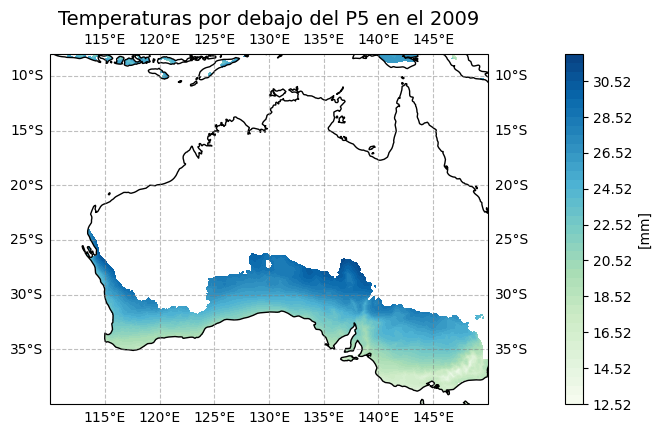

In [ ]:
# A diferencia de las anomalías ya no tenemos que hacer más cálculos
# Podemos plotear directamente


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels = True, dms = True, x_inline = False, y_inline = False, color = 'gray', alpha = 0.5, linestyle='--')
cs = ax.contourf(lons, lats, result[0], levels = np.arange(np.min(result[0]), np.max(result[0]) + 1, 0.5), cmap = 'GnBu',  transform=ccrs.PlateCarree())
plt.colorbar(cs, pad = 0.1, label = '[mm]')
plt.title('Temperaturas por debajo del P5 en el 2009', fontsize = 14)

Text(0.5, 1.0, 'Temperaturas por arriba del P95 en el 2009')

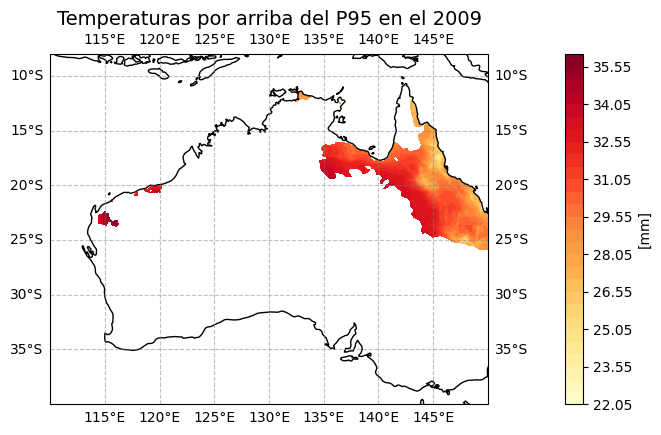

In [ ]:
result2 = comp_year.where(comp_year >= P_95)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels = True, dms = True, x_inline = False, y_inline = False, color = 'gray', alpha = 0.5, linestyle='--')
cs = ax.contourf(lons, lats, result2[0], levels = np.arange(np.min(result2[0]), np.max(result2[0]) + 1, 0.5), cmap = 'YlOrRd',  transform=ccrs.PlateCarree())
plt.colorbar(cs, pad = 0.1, label = '[mm]')
plt.title('Temperaturas por arriba del P95 en el 2009', fontsize = 14)